In [71]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from alpaca_functions import time_formatter, calculate_indicators, get_predictions, get_sentiment
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [72]:
today = time_formatter(time.time())
start = time_formatter(time.time() - (604800 * 13))         # Trying with the last 120 ish days # 52))

# get ticker to trade
# raw_data, ticker = get_stuff_to_trade(today, start)

# ticker = "VRSK"
ticker = "AMAT"
raw_data = os.path.relpath("data/AMAT_test_data_1D_year_OCT2018-2019_2.csv")        # 1d window

# calculate indicators and stuff
indicators = calculate_indicators(raw_data, ticker)
sentiment = get_sentiment(ticker)
# get_edgar_score(indicators, ticker)

# train models
print("volume")
volume_train, volume_test = get_predictions(indicators["volume"])
print("high price")
high_train, high_test = get_predictions(indicators["high"])
print("closing price")
close_train, close_test = get_predictions(indicators["close"])
print("macd")
macd_train, macd_test = get_predictions(indicators["macd"])
signal_train, signal_test = get_predictions(indicators["signal"])
print("MFI")
mfi_train, mfi_test = get_predictions(indicators["mfi"])
print("Stochastic oscillator")
stoch_train, stoch_test = get_predictions(indicators["stoch"])

volume_test = volume_test[~np.isnan(volume_test)]
high_test = high_test[~np.isnan(high_test)]
close_test = close_test[~np.isnan(close_test)]
macd_test = macd_test[~np.isnan(macd_test)]
signal_test = signal_test[~np.isnan(signal_test)]
mfi_test = mfi_test[~np.isnan(mfi_test)]
stoch_test = stoch_test[~np.isnan(stoch_test)]

print("volume test:", volume_test[-1], " current volume:", indicators["volume"].iloc[-1])
print("close test:", close_test[-1], " current close:", indicators["close"].iloc[-1])
print("macd test:", macd_test[-1], " current macd:", indicators["macd"].iloc[-1])
print("signal test:", signal_test[-1], " current signal:", indicators["signal"].iloc[-1])
print("mfi test:", mfi_test[-1], " current mfi:", indicators["mfi"].iloc[-1])
print("stoch test:", stoch_test[-1], " current stoch:", indicators["stoch"].iloc[-1])

print("sentiment:", sentiment)

50.59 49.89 48.78


TypeError: get_sentiment() missing 1 required positional argument: 'dataframe'

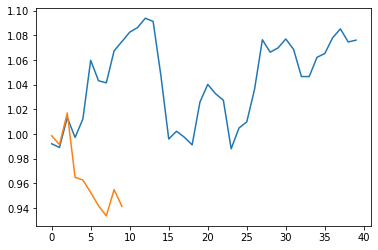

In [63]:
# close
plt.plot(np.cumprod(close_train+1), label="ass")
plt.plot(np.cumprod(close_test+1), label="dick")

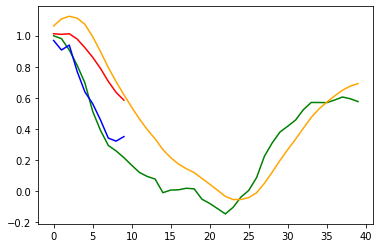

In [64]:
# macd
plt.plot(np.cumprod(macd_train+1), color="green")
plt.plot(np.cumprod(signal_train+1), color="orange")
# test
plt.plot(np.cumprod(macd_test+1), color="blue")
plt.plot(np.cumprod(signal_test+1), color="red")

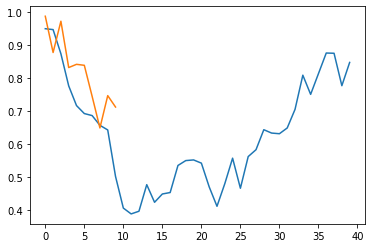

In [65]:
# MFI
plt.plot(np.cumprod(mfi_train+1))
plt.plot(np.cumprod(mfi_test+1))

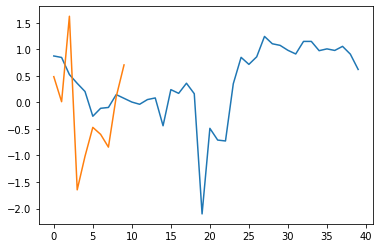

In [66]:
# stochastic oscillator  
plt.plot(np.cumprod(stoch_train+1))
plt.plot(np.cumprod(stoch_test+1))

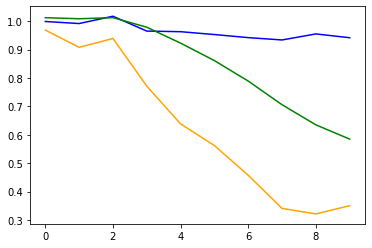

In [67]:
# macd and signal + close w/ volume
plt.plot(np.cumprod(close_test+1), color="blue")
plt.plot(np.cumprod(macd_test+1), color="orange")
plt.plot(np.cumprod(signal_test+1), color="green")
# plt.plot(np.cumprod(volume_test+1), color="black")

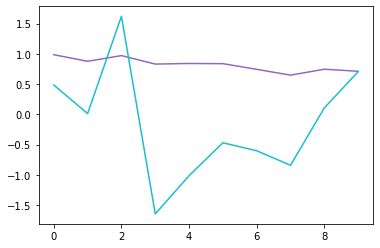

In [68]:
# stoch + mfi w/ volume
plt.plot(np.cumprod(mfi_test+1), color="#9467bd")
plt.plot(np.cumprod(stoch_test+1), color="#17becf")
# plt.plot(np.cumprod(volume_test+1), color="black")